
# IoT Botnet Detection Using Machine Learning and Deep Learning

This project aims to detect botnet attacks in IoT devices using a combination of machine learning and deep learning models. The steps include:
- Dataset analysis and preprocessing.
- Implementation of multiple ML and DL models.
- Model evaluation and comparison.
- Visualizations for insights.

---


##mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


### LOADING DATASET

Dataset Head:
   Unnamed: 0            ts                 uid        id.orig_h  id.orig_p  \
0           0  1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103    60905.0   
1           1  1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103    44301.0   
2           2  1.525880e+09  CMBrup3BLXivSp4Avc  192.168.100.103    50244.0   
3           3  1.525880e+09  CfHl9r3XMYtDQRrHnh  192.168.100.103    34243.0   
4           4  1.525880e+09  C7USrA15nFVkniMqC5  192.168.100.103    34840.0   

         id.resp_h  id.resp_p service  duration  orig_bytes  ...  \
0  131.174.215.147       23.0       -  2.998796           0  ...   
1      91.42.47.63       23.0       -  0.000000           0  ...   
2  120.210.108.200       23.0       -  0.000000           0  ...   
3     147.7.65.203    49560.0       -  2.998804           0  ...   
4     145.164.35.6    21288.0       -  0.000000           0  ...   

   conn_state_RSTOS0 conn_state_RSTR conn_state_RSTRH  conn_state_S0  \
0              False          

<ipython-input-3-2da627768af6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


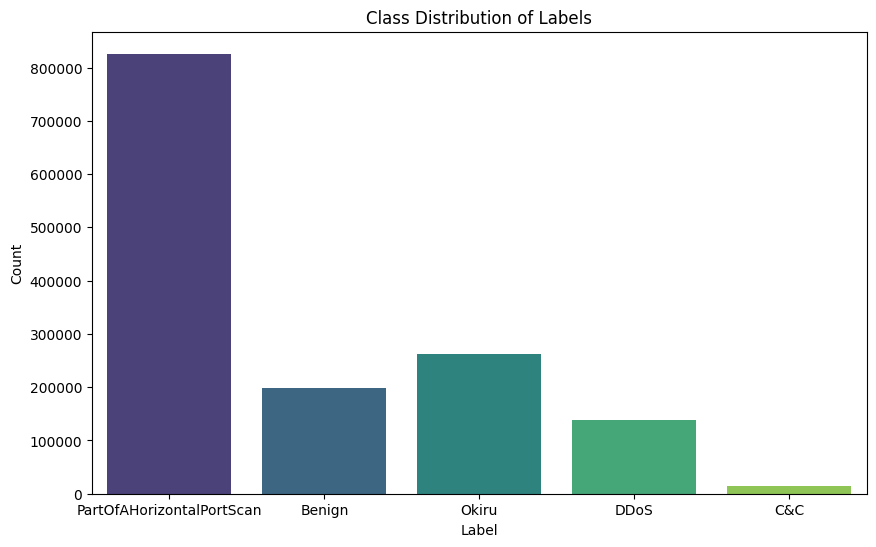

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/drive/MyDrive/iot23_combined.csv'
data = pd.read_csv(data_path)

# Display basic info
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nLabel Distribution:")
print(data['label'].value_counts())  # Analyze label distribution

# Visualizing the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Class Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()



## Data Preprocessing

In [4]:
# Drop irrelevant columns if they exist
columns_to_drop = ['Unnamed: 0', 'uid', 'id.orig_h', 'id.resp_h', 'local_orig', 'local_resp', 'history', 'service']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]  # Only keep columns that exist
data = data.drop(columns=columns_to_drop, axis=1)

# Encode labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Split features and target
X = data.drop('label', axis=1)
y = data['label']

# Handle missing values if any
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display label mapping
print("Label Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Label Mapping: {'Benign': 0, 'C&C': 1, 'DDoS': 2, 'Okiru': 3, 'PartOfAHorizontalPortScan': 4}


## Machine Learning Models

### RANDOM FOREST

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
rf_predictions = rf_model.predict(X_test)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, rf_predictions)
print("Random Forest Confusion Matrix:\n", cm)

# Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# ROC Curve for Random Forest
if len(np.unique(y)) == 2:  # Binary classification check
    rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs, pos_label=1)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure()
    plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Random Forest Classifier")
    plt.legend()
    plt.show()
else:
    print("ROC Curve is only applicable for binary classification tasks.")




In [6]:
from sklearn.metrics import accuracy_score

# Calculate Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 1.00


###Xg Boost

  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.00
XGBoost Confusion Matrix:
 [[ 59311      0      2      0     30]
 [     4   4522      0      0      4]
 [     0      0  41633      0      0]
 [     0      0      0  78807      0]
 [     3      0      0      0 247779]]


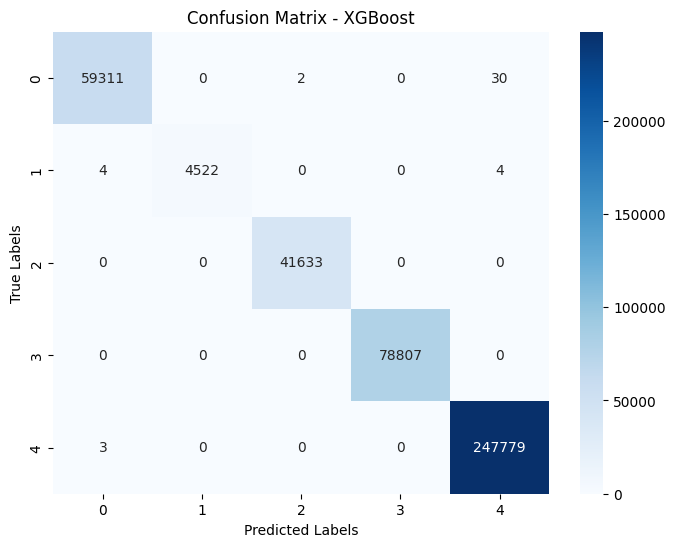

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59343
           1       1.00      1.00      1.00      4530
           2       1.00      1.00      1.00     41633
           3       1.00      1.00      1.00     78807
           4       1.00      1.00      1.00    247782

    accuracy                           1.00    432095
   macro avg       1.00      1.00      1.00    432095
weighted avg       1.00      1.00      1.00    432095

ROC Curve is only applicable for binary classification tasks.


In [ ]:
# Install XGBoost
!pip install xgboost

# Import XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, xgb_predictions)
print("XGBoost Confusion Matrix:\n", cm)

# Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))

# ROC Curve for XGBoost
if len(np.unique(y)) == 2:  # Binary classification check
    xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs, pos_label=1)
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
    plt.figure()
    plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - XGBoost Classifier")
    plt.legend()
    plt.show()
else:
    print("ROC Curve is only applicable for binary classification tasks.")


## Deep Learning Models

### DNN & LSTM

Epoch 1/10
12603/12603 [==============================] - 27s 2ms/step - loss: 0.1097 - accuracy: 0.9657 - val_loss: 0.0488 - val_accuracy: 0.9827
Epoch 2/10
12603/12603 [==============================] - 25s 2ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0351 - val_accuracy: 0.9898
Epoch 3/10
12603/12603 [==============================] - 26s 2ms/step - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.0339 - val_accuracy: 0.9908
Epoch 4/10
12603/12603 [==============================] - 27s 2ms/step - loss: 0.0431 - accuracy: 0.9877 - val_loss: 0.0328 - val_accuracy: 0.9889
Epoch 5/10
12603/12603 [==============================] - 26s 2ms/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.0280 - val_accuracy: 0.9905
Epoch 6/10
12603/12603 [==============================] - 26s 2ms/step - loss: 0.0448 - accuracy: 0.9880 - val_loss: 0.0291 - val_accuracy: 0.9905
Epoch 7/10
12603/12603 [==============================] - 26s 2ms/step - loss: 0.0362 - accuracy: 0.9878 - val_loss: 0

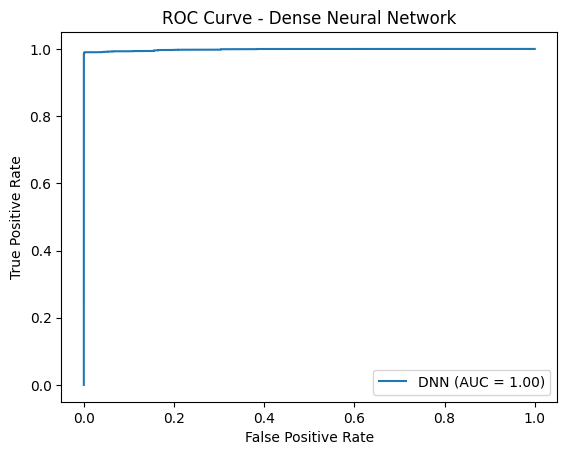

Epoch 1/10
12603/12603 [==============================] - 44s 3ms/step - loss: 0.1471 - accuracy: 0.9501 - val_loss: 0.0627 - val_accuracy: 0.9774
Epoch 2/10
12603/12603 [==============================] - 43s 3ms/step - loss: 0.0744 - accuracy: 0.9748 - val_loss: 0.0475 - val_accuracy: 0.9832
Epoch 3/10
12603/12603 [==============================] - 43s 3ms/step - loss: 0.0591 - accuracy: 0.9789 - val_loss: 0.0416 - val_accuracy: 0.9853
Epoch 4/10
12603/12603 [==============================] - 42s 3ms/step - loss: 0.0548 - accuracy: 0.9809 - val_loss: 0.0376 - val_accuracy: 0.9890
Epoch 5/10
12603/12603 [==============================] - 39s 3ms/step - loss: 0.0475 - accuracy: 0.9837 - val_loss: 0.0301 - val_accuracy: 0.9912
Epoch 6/10
12603/12603 [==============================] - 40s 3ms/step - loss: 0.0481 - accuracy: 0.9861 - val_loss: 0.0279 - val_accuracy: 0.9909
Epoch 7/10
12603/12603 [==============================] - 40s 3ms/step - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0

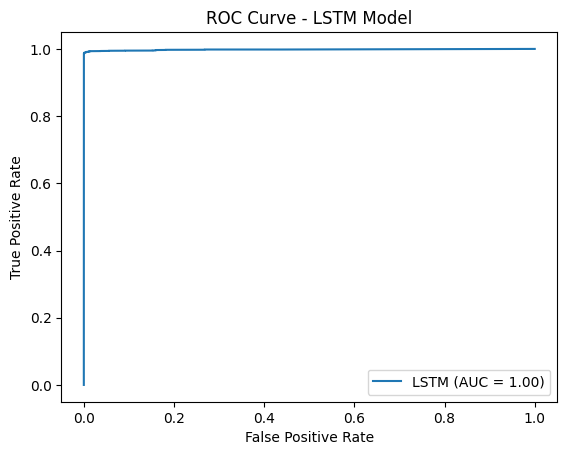

In [ ]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Dense Neural Network
dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])
dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
dnn_eval = dnn.evaluate(X_test, y_test)
print("Dense Neural Network Evaluation:", dnn_eval)

# Generate Confusion Matrix and Classification Report for DNN
dnn_predictions = np.argmax(dnn.predict(X_test), axis=1)
print("DNN Confusion Matrix:\n", confusion_matrix(y_test, dnn_predictions))
print("DNN Classification Report:\n", classification_report(y_test, dnn_predictions))

# ROC Curve for DNN
fpr_dnn, tpr_dnn, _ = roc_curve(y_test, dnn.predict(X_test)[:, 1], pos_label=1)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)
plt.figure()
plt.plot(fpr_dnn, tpr_dnn, label=f"DNN (AUC = {roc_auc_dnn:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Dense Neural Network")
plt.legend()
plt.show()

# LSTM Model
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])
lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2)
lstm_eval = lstm.evaluate(X_test_lstm, y_test)
print("LSTM Model Evaluation:", lstm_eval)

# Generate Confusion Matrix and Classification Report for LSTM
lstm_predictions = np.argmax(lstm.predict(X_test_lstm), axis=1)
print("LSTM Confusion Matrix:\n", confusion_matrix(y_test, lstm_predictions))
print("LSTM Classification Report:\n", classification_report(y_test, lstm_predictions))

# ROC Curve for LSTM
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm.predict(X_test_lstm)[:, 1], pos_label=1)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {roc_auc_lstm:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LSTM Model")
plt.legend()
plt.show()


13503/13503 [==============================] - 16s 1ms/step


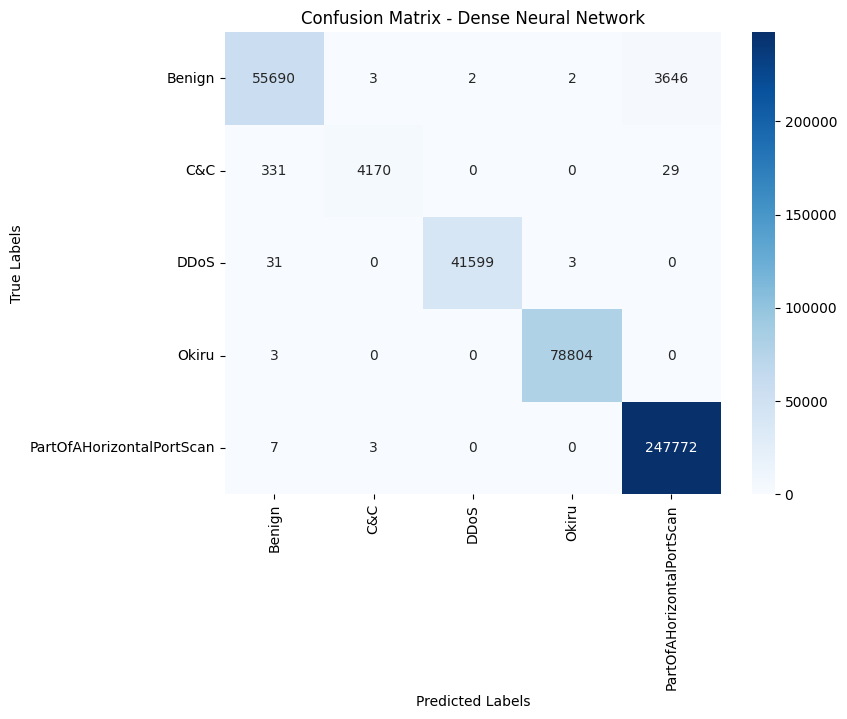

13503/13503 [==============================] - 22s 2ms/step


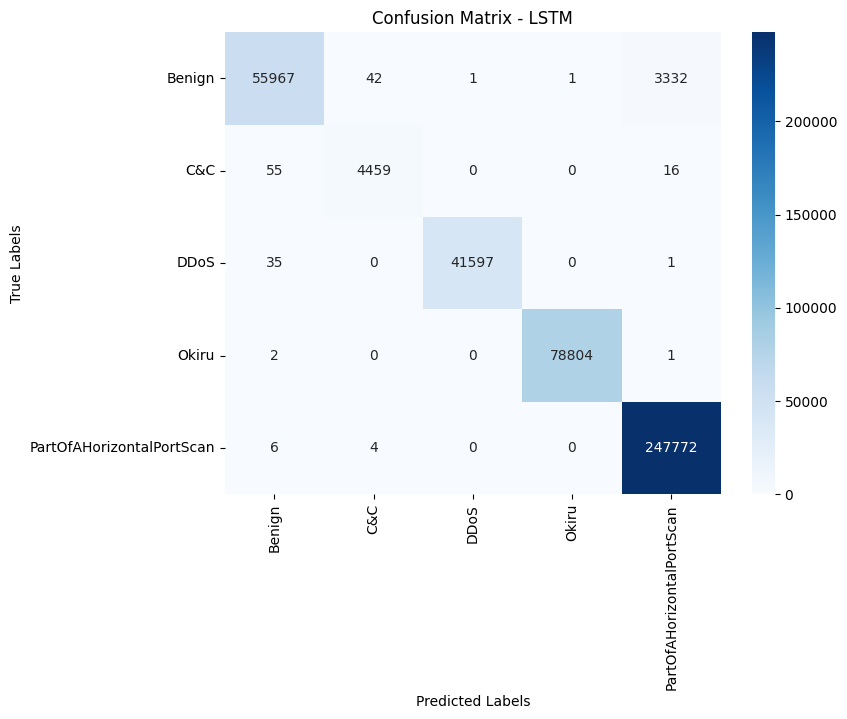

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for DNN
dnn_predictions = np.argmax(dnn.predict(X_test), axis=1)
dnn_cm = confusion_matrix(y_test, dnn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(dnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Dense Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Confusion Matrix for LSTM
lstm_predictions = np.argmax(lstm.predict(X_test_lstm), axis=1)
lstm_cm = confusion_matrix(y_test, lstm_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:

# Dense Neural Network
dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])
dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
dnn_eval = dnn.evaluate(X_test, y_test)
print("Dense Neural Network Evaluation:", dnn_eval)

# LSTM Model
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])
lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2)
lstm_eval = lstm.evaluate(X_test_lstm, y_test)
print("LSTM Model Evaluation:", lstm_eval)


Epoch 1/10
12603/12603 [==============================] - 27s 2ms/step - loss: 0.1114 - accuracy: 0.9653 - val_loss: 0.0474 - val_accuracy: 0.9863
Epoch 2/10
12603/12603 [==============================] - 27s 2ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0341 - val_accuracy: 0.9893
Epoch 3/10
12603/12603 [==============================] - 26s 2ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 4/10
12603/12603 [==============================] - 26s 2ms/step - loss: 0.0499 - accuracy: 0.9871 - val_loss: 0.0309 - val_accuracy: 0.9902
Epoch 5/10
12603/12603 [==============================] - 26s 2ms/step - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.0298 - val_accuracy: 0.9903
Epoch 6/10
12603/12603 [==============================] - 27s 2ms/step - loss: 0.0370 - accuracy: 0.9872 - val_loss: 0.0304 - val_accuracy: 0.9896
Epoch 7/10
12603/12603 [==============================] - 26s 2ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0

## Results and Visualizations

In [ ]:

# Accuracy values
accuracies = {
    'Model': ['Random Forest', 'Dense Neural Network', 'LSTM'],
    'Accuracy': [0.9999004848470823, 0.9920873641967773, 0.992341935634613]
}

# Create a DataFrame
accuracy_df = pd.DataFrame(accuracies)

# Display the table
print(accuracy_df)


                  Model  Accuracy
0         Random Forest  0.999900
1  Dense Neural Network  0.992087
2                  LSTM  0.992342


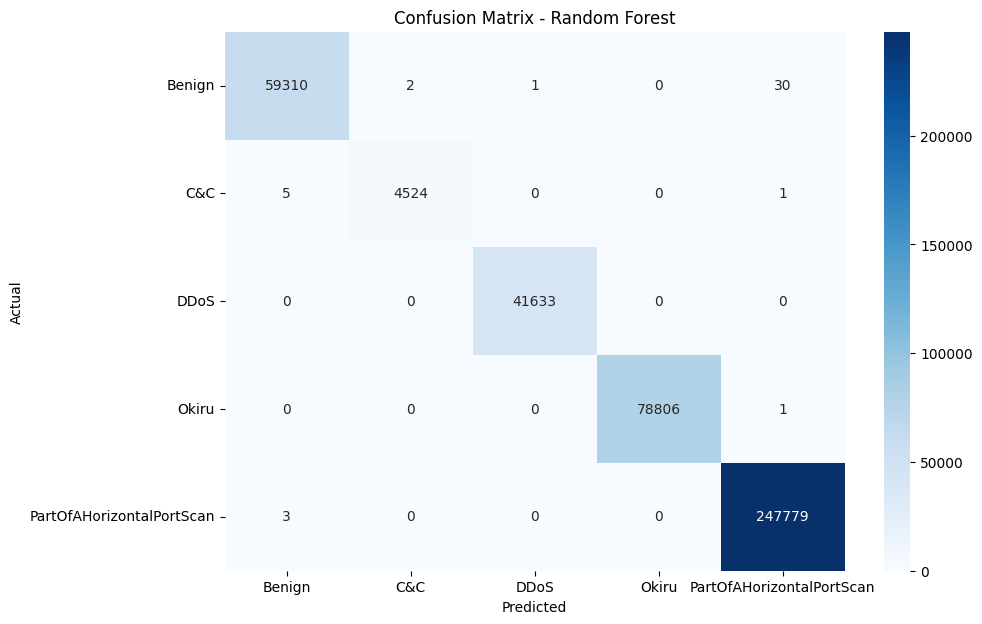

In [ ]:

# Plot confusion matrix for Random Forest
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

